In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criando código para gerar gráficos 

In [26]:
data=pd.read_csv('SINASC_RO_2019.csv')
df_abril=pd.read_csv('SINASC_RO_2019_ABR.csv')
df_marco=pd.read_csv('SINASC_RO_2019_MAR.csv')
df_maio=pd.read_csv('SINASC_RO_2019_MAI.csv')
df_junho=pd.read_csv('SINASC_RO_2019_JUN.csv')
df_dezembro=pd.read_csv('SINASC_RO_2019_DEZ.csv')


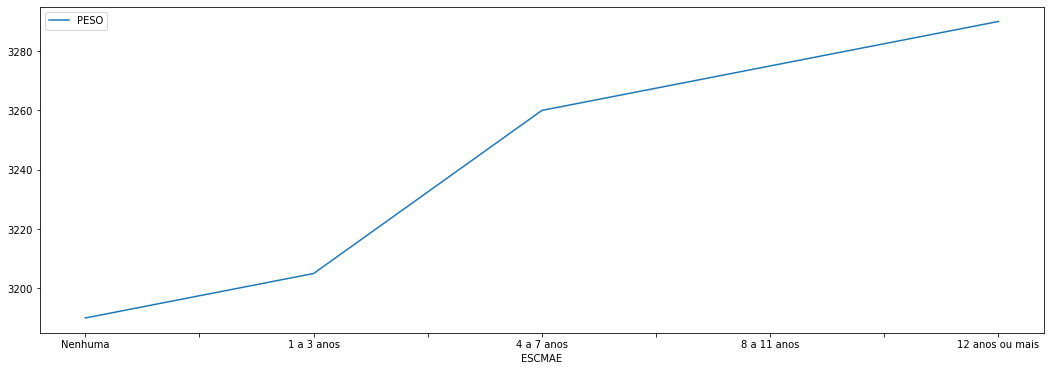

In [24]:
pd.pivot_table(abril, values='PESO', index=['ESCMAE'],
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6]);

In [28]:
df_maio.columns

Index(['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
       'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'],
      dtype='object')

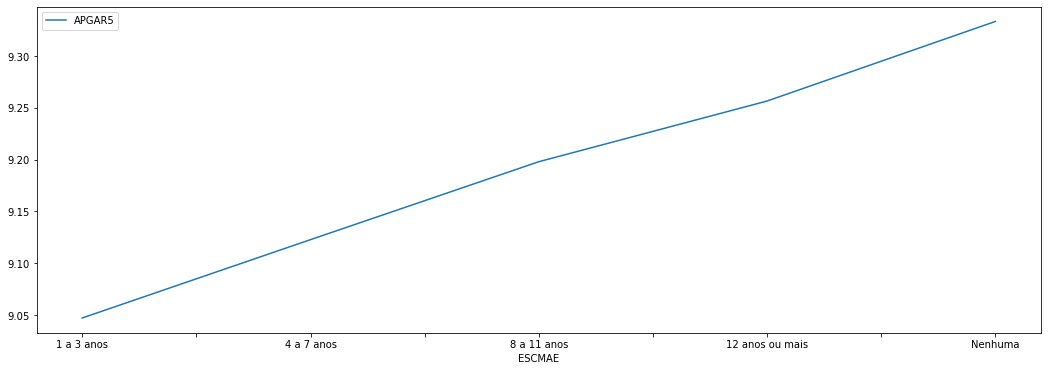

In [30]:
pd.pivot_table(df_maio, values='APGAR5', index=['ESCMAE'],
               aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6]);

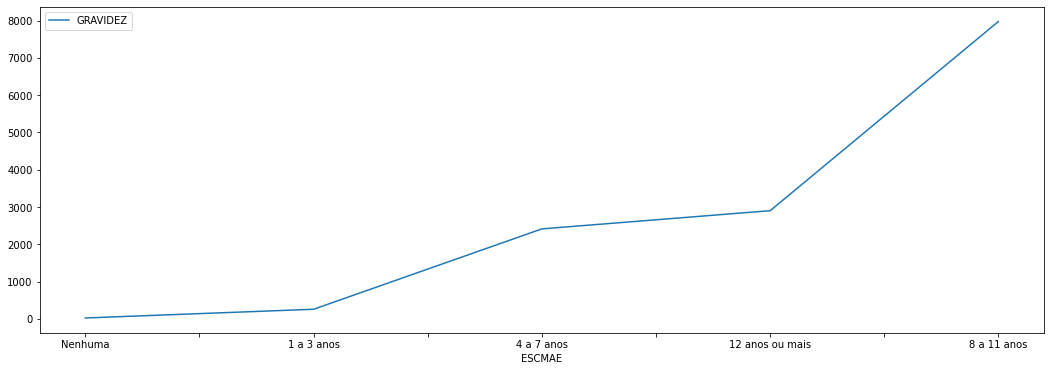

In [33]:
pd.pivot_table(df_junho, values='GRAVIDEZ', index=['ESCMAE'],
               aggfunc='count').sort_values('GRAVIDEZ').plot(figsize=[18, 6]);

### Automatizando o processo para gerar novos graficos

- É possível automatizar o processo para gerar graficos para os proximos meses criando uma função onde informamos a base que e alguns valores que desejamos visualizar

In [18]:
def gerar_grafico(data,value,index,func,ylabel,xlabel,opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(data, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
            pd.pivot_table(data, values=value, index=index,
                           aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
            pd.pivot_table(data, values=value, index=index,
                           aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None
    

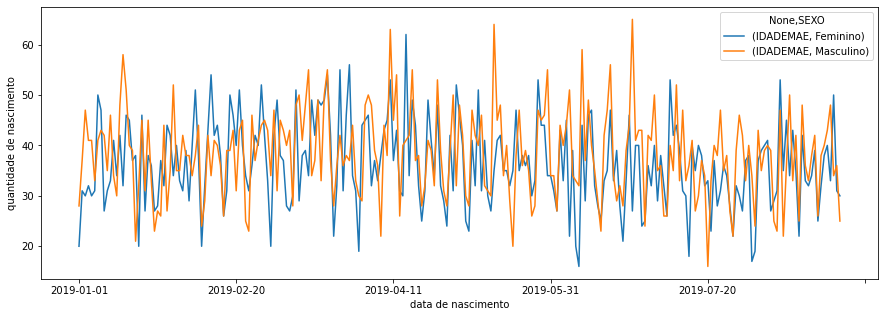

In [25]:
gerar_grafico(agos,'IDADEMAE',['DTNASC','SEXO'],'count','quantidade de nascimento','data de nascimento',opcao='unstack');